In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [ ]:
data = pd.read_csv('data_evaluacion.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Agregamos la fila de encabezado
header = [
    'edad', 'clase_de_trabajo', 'fnlwgt', 'educación', 'num_educativo',
    'estado_civil', 'ocupación', 'relación', 'raza', 'género',
    'ganancia_de_capital', 'pérdida_de_capital', 'horas_por_semana',
    'país_nativo', 'ingresos'
]
df_header = pd.DataFrame([header])
data.columns = header
data.head()

,edad,clase_de_trabajo,fnlwgt,educación,num_educativo,estado_civil,ocupación,relación,raza,género,ganancia_de_capital,pérdida_de_capital,horas_por_semana,país_nativo,ingresos
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.info()

In [ ]:
## Selección de caracteristicas
X = data.drop("ingresos", axis=1)
y = data['ingresos']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Separar variables categóricas y numéricas
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

# Escalar las variables numéricas
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Codificar las variables categóricas (One-Hot Encoding)
X_train = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

# Alinear los conjuntos de entrenamiento y prueba para asegurarse de que tienen las mismas columnas
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

Accuracy (SVM): 0.8493192752584706

Classification Report (SVM):
               precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      7414
        >50K       0.75      0.56      0.64      2355

    accuracy                           0.85      9769
   macro avg       0.81      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769


Confusion Matrix (SVM):
 [[6979  435]
 [1037 1318]]


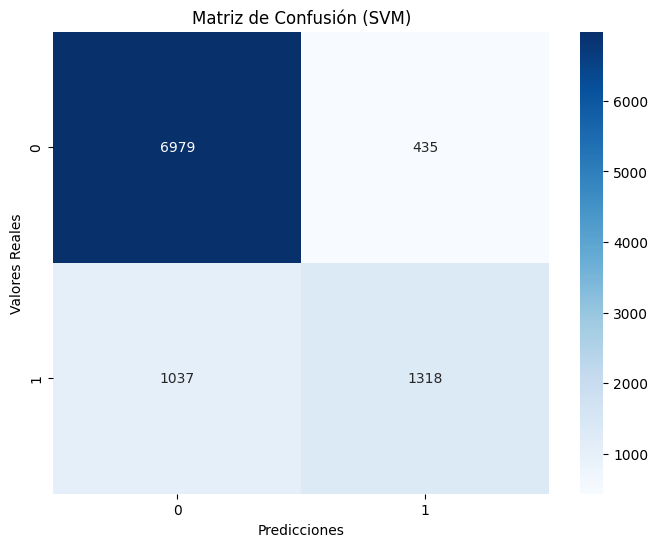

In [ ]:
# Crear y entrenar el modelo SVM con kernel lineal
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

# Evaluar el modelo SVM
accuracy_linear = accuracy_score(y_test, y_pred_svm)
print("Accuracy (SVM):", accuracy_linear)
print("\nClassification Report (SVM):\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix (SVM):\n", confusion_matrix(y_test, y_pred_svm))

# Gráfico de la matriz de confusión (SVM)
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (SVM)')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

Accuracy (SVM): 0.8533114955471389

Classification Report (SVM):
               precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91      7414
        >50K       0.77      0.55      0.65      2355

    accuracy                           0.85      9769
   macro avg       0.82      0.75      0.78      9769
weighted avg       0.85      0.85      0.84      9769


Confusion Matrix (SVM):
 [[7033  381]
 [1052 1303]]


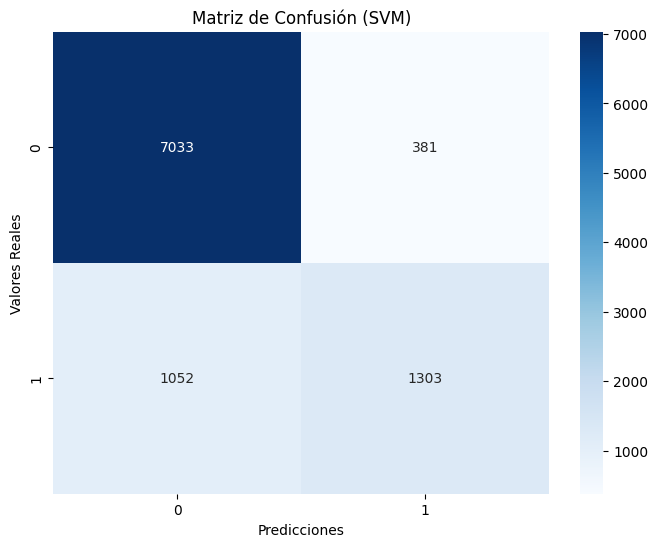

In [ ]:
# Crear y entrenar el modelo SVM con kernel poly
svm_model = SVC(kernel='poly')
svm_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

# Evaluar el modelo SVM
accuracy_poly = accuracy_score(y_test, y_pred_svm)
print("Accuracy (SVM):", accuracy_poly)
print("\nClassification Report (SVM):\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix (SVM):\n", confusion_matrix(y_test, y_pred_svm))

# Gráfico de la matriz de confusión (SVM)
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (SVM)')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

Accuracy (SVM): 0.8545398710205753

Classification Report (SVM):
               precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91      7414
        >50K       0.77      0.56      0.65      2355

    accuracy                           0.85      9769
   macro avg       0.82      0.76      0.78      9769
weighted avg       0.85      0.85      0.85      9769


Confusion Matrix (SVM):
 [[7018  396]
 [1025 1330]]


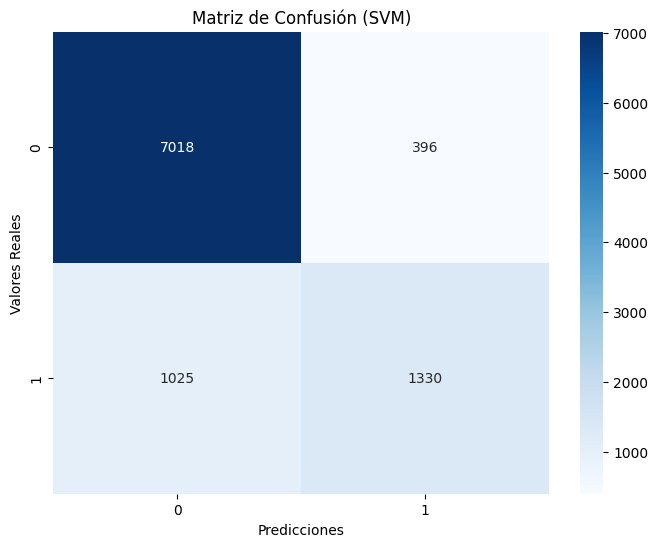

In [ ]:
# Crear y entrenar el modelo SVM con kernel rbf
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

# Evaluar el modelo SVM
accuracy_rbf = accuracy_score(y_test, y_pred_svm)
print("Accuracy (SVM):", accuracy_rbf)
print("\nClassification Report (SVM):\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix (SVM):\n", confusion_matrix(y_test, y_pred_svm))

# Gráfico de la matriz de confusión (SVM)
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (SVM)')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

Accuracy (SVM): 0.7648684614597195

Classification Report (SVM):
               precision    recall  f1-score   support

       <=50K       0.84      0.85      0.85      7414
        >50K       0.51      0.50      0.51      2355

    accuracy                           0.76      9769
   macro avg       0.68      0.67      0.68      9769
weighted avg       0.76      0.76      0.76      9769


Confusion Matrix (SVM):
 [[6297 1117]
 [1180 1175]]


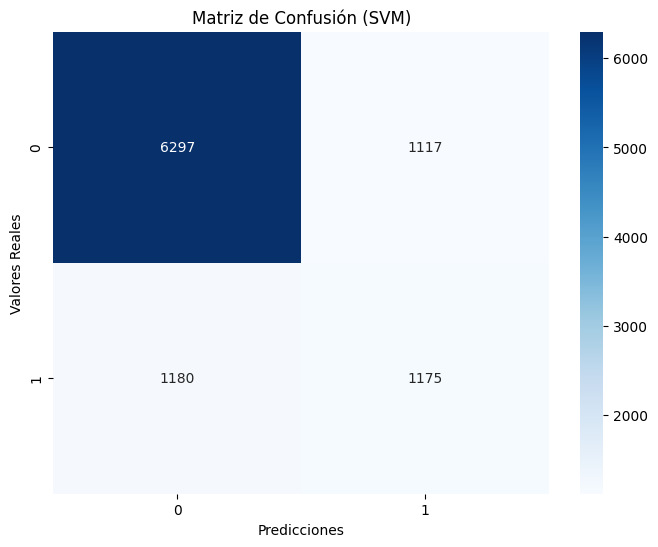

In [ ]:
# Crear y entrenar el modelo SVM con kernel sigmoid
svm_model = SVC(kernel='sigmoid')
svm_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

# Evaluar el modelo SVM
accuracy_sigmoid = accuracy_score(y_test, y_pred_svm)
print("Accuracy (SVM):", accuracy_sigmoid)
print("\nClassification Report (SVM):\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix (SVM):\n", confusion_matrix(y_test, y_pred_svm))

# Gráfico de la matriz de confusión (SVM)
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (SVM)')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

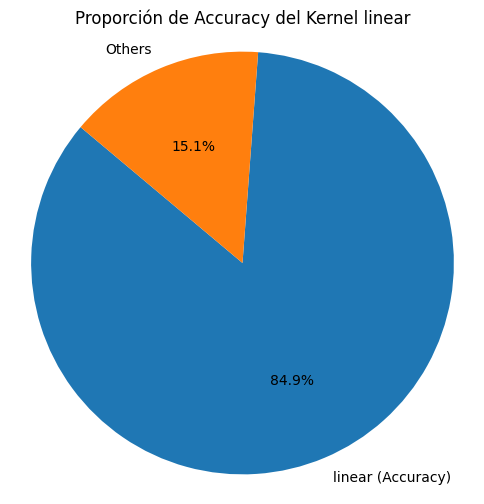

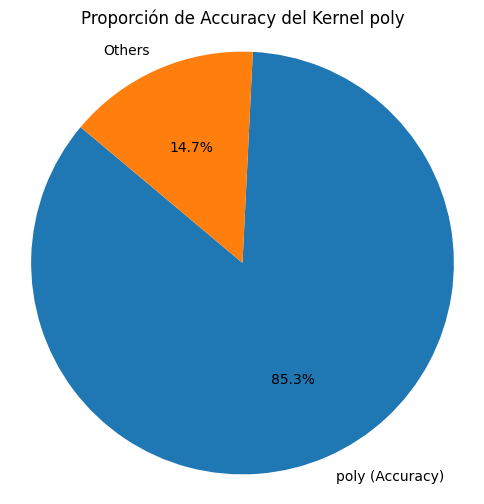

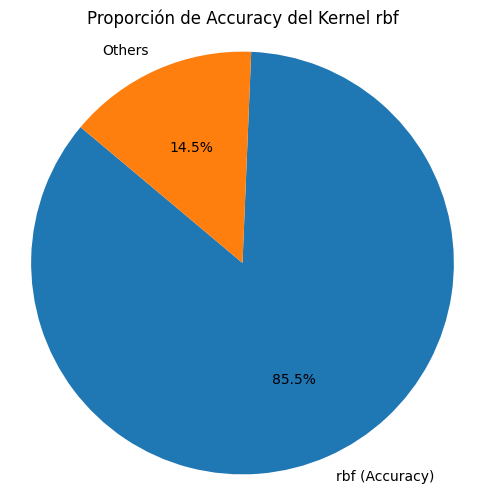

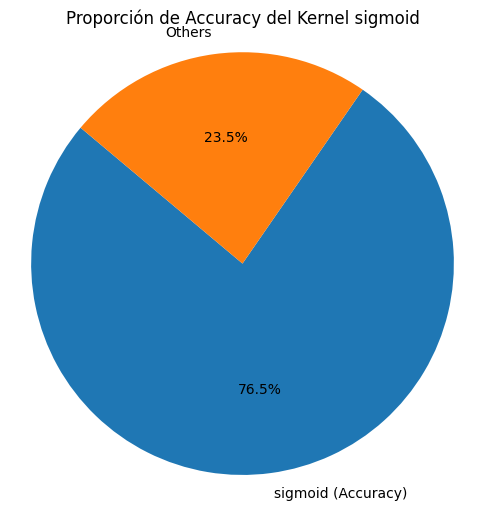

In [ ]:
accuracies = [accuracy_linear, accuracy_poly, accuracy_rbf, accuracy_sigmoid]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Crear la gráfica de pastel para las precisiones de los 4 kernels
for i, kernel in enumerate(kernels):
    plt.figure(figsize=(6, 6))
    plt.pie([accuracies[i], 1 - accuracies[i]], labels=[f'{kernel} (Accuracy)', 'Others'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Proporción de Accuracy del Kernel {kernel}')
    plt.axis('equal')  # Para que el gráfico de pastel sea un círculo
    plt.show()

## Conclusiones
Vemos que el modelo clasifica correctamente las clases debido al acurracy que arroja de 0.8493% lo cual es bueno.
En cuanto al equilibrio de aprendizaje podemos decir que el modelo aprende no nos encontramos en un caso de under u overfiting por el valor de la diferencia de acurracy de 2%.
En cuanto a las matrices de confusión de cada uno de los kernels vemos que no es mucha la diferencia y que todos llegan al mismo resultado que hay una mejor precisión para la clase 0 (<=50K) que la clase 1 (>50K)